In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
dat=np.load('psth_prototypes_arr_z.npy')

In [42]:
dat_lst=[]

for j in range(0,10):
    for i in range(0,10):
        dat_lst.append(list(dat[j,i,:]))
        
dat_lst=np.array(dat_lst)
#print(dat_lst.shape)

In [6]:
dat.shape

(10, 10, 26)

In [34]:
cl=AgglomerativeClustering(n_clusters=10).fit(dat_lst)

In [15]:
cl.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 10}

In [16]:
from scipy.cluster.hierarchy import dendrogram

In [31]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    print(linkage_matrix.shape)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = dat_lst

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=10)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

ValueError: Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.

In [54]:
print(dat_lst.shape)

(100, 26)


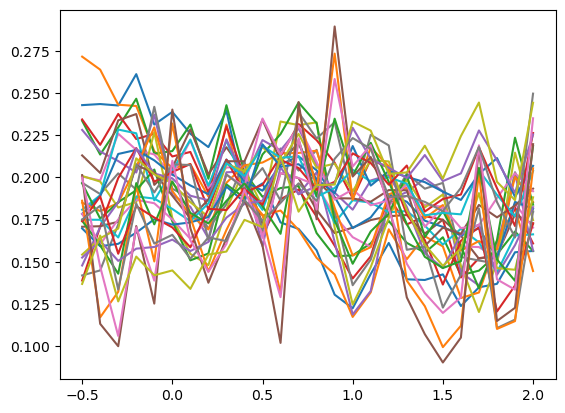

In [89]:
clusters=cl.labels_
inds=np.where(cl.labels_==0)
for j in inds:
    plt.plot(np.arange(-0.5,2.1,0.1),dat_lst[j,:].T)
    plt.show()

In [29]:
model.labels_

array([87, 86, 58, 88, 97, 55, 85, 57, 89, 93, 60, 95, 82, 28, 79, 54, 99,
       56, 67, 59, 78, 53, 76, 52, 50, 81, 73, 43, 91, 92, 96, 27, 72, 77,
       64, 83, 65, 51, 90, 25, 98, 63, 45, 44, 69, 70, 61, 66, 13, 62, 94,
       30, 84, 75, 80, 74, 29, 39, 68, 71, 21, 49, 48, 37, 14, 31, 35, 41,
       36, 38, 34, 18, 47, 46, 32, 23, 26, 33, 16, 40, 19, 24, 22, 10, 42,
       20, 17, 12, 15,  9, 11,  8,  7,  3,  4,  6,  1,  5,  2,  0])

In [37]:
print(len(dat_lst))

100


In [41]:
import pandas as pd
import dash_bio


#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Dash_Bio/Chromosomal/clustergram_brain_cancer.csv')

dash_bio.Clustergram(
    data=np.array(dat_lst),
    height=800,
    width=700
)

In [40]:
help(dash_bio.Clustergram)

Help on function Clustergram in module dash_bio.component_factory._clustergram:

Clustergram(data, generate_curves_dict=False, return_computed_traces=False, computed_traces=None, row_labels=None, row_colors=None, row_colors_label=None, column_labels=None, column_colors=None, column_colors_label=None, hidden_labels=None, standardize='none', cluster='all', row_dist='euclidean', col_dist='euclidean', dist_fun=<function pdist at 0x7fd801fdc310>, link_fun=None, link_method=None, color_threshold=None, optimal_leaf_order=False, color_map=None, color_list=None, display_range=3, center_values=True, log_transform=False, display_ratio=0.2, imputer_parameters=None, row_group_marker=None, col_group_marker=None, tick_font=None, annotation_font=None, line_width=0.5, paper_bg_color='rgba(0,0,0,0)', plot_bg_color='rgba(0,0,0,0)', height=500, width=500)
    Return a Dash Bio Clustergram object.
    
    Keyword arguments:
    
    - data (2D array-like; required): Matrix or table of observations (droppi